In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fb = pd.read_csv("/Users/emilyramos/Desktop/pythom/Facebook_Marketplace_data.csv")

In [42]:
df = pd.read_csv("/Users/emilyramos/Desktop/pythom/Facebook_Marketplace_data.csv")
display(df.head())

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [43]:
# Listar columnas del DataFrame para validar nombres
print(df.columns.tolist())

['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']


In [44]:
# Limpieza 
df_clean = df.copy()

# Eliminar columnas vacías 
columnas_vacias = [col for col in df_clean.columns if df_clean[col].isnull().all()]
df_clean = df_clean.drop(columns=columnas_vacias)

print("Columnas finales:", df_clean.columns.tolist())


Columnas finales: ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


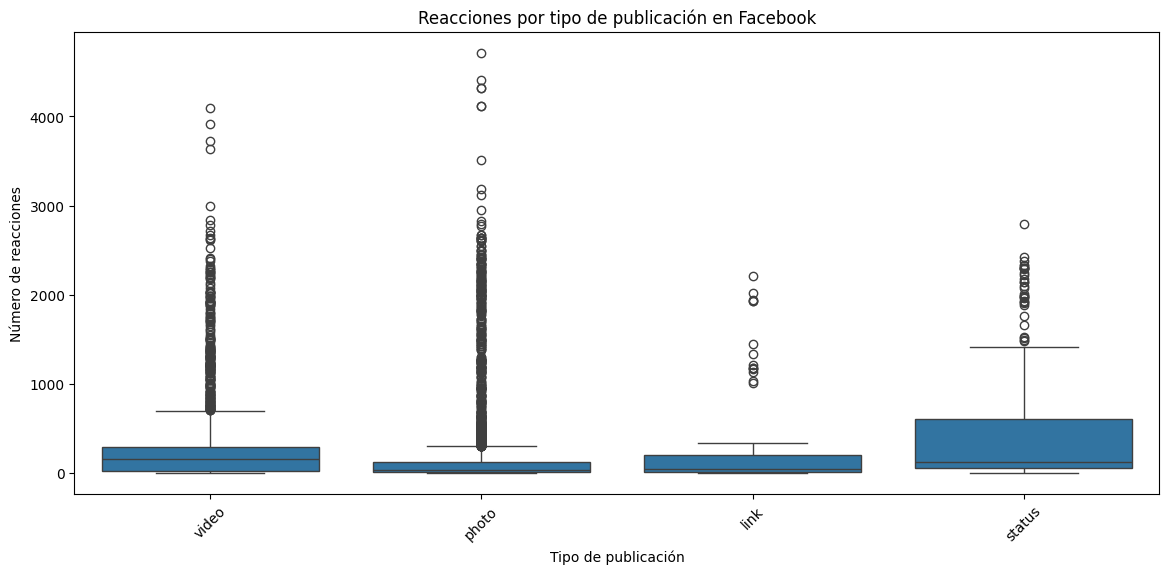

In [45]:

# Boxplot: Reacciones por tipo de publicación
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x="status_type", y="num_reactions")
plt.title("Reacciones por tipo de publicación en Facebook")
plt.xlabel("Tipo de publicación")
plt.ylabel("Número de reacciones")
plt.xticks(rotation=45)
plt.show()


In [46]:
# Calcular la correlación
corr_table = df_clean[["num_reactions", "num_comments", "num_shares"]].corr()

print(corr_table)




               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


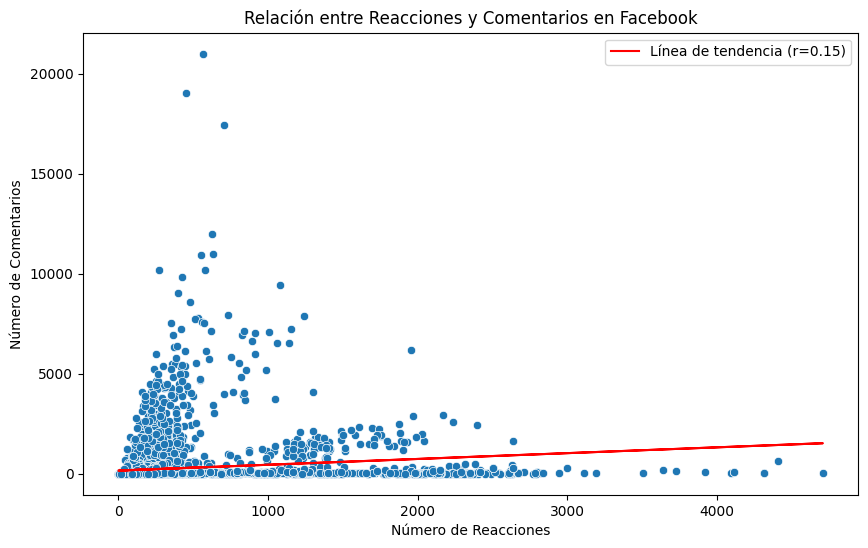

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Variables
x = df_clean['num_reactions']
y = df_clean['num_comments']

#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)

slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.plot(x, intercept + slope * x, color='red', label=f'Línea de tendencia (r={r_value:.2f})')

plt.xlabel('Número de Reacciones')
plt.ylabel('Número de Comentarios')
plt.title('Relación entre Reacciones y Comentarios en Facebook')
plt.legend()
plt.show()



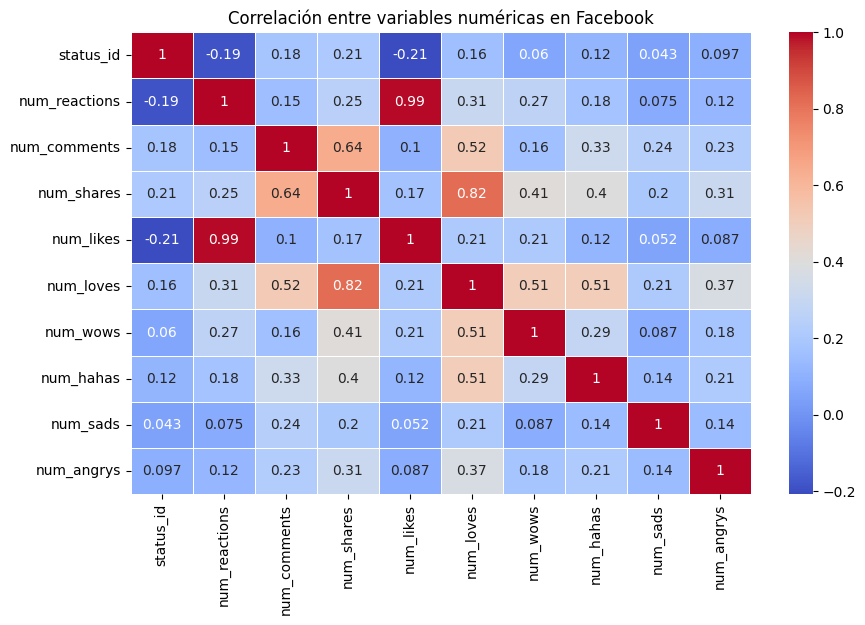

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación con las columnas numéricas
correlation_matrix = df_clean.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlación entre variables numéricas en Facebook")
plt.show()
